In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/DAUP/insurance.csv")

In [5]:
p_smoker = 0.30
n = 10
k = 4
prob_at_least_4 = 1 - binom.cdf(k-1, n, p_smoker)
print(f"Probability of at least 4 smokers: {prob_at_least_4:.4f}")

Probability of at least 4 smokers: 0.3504


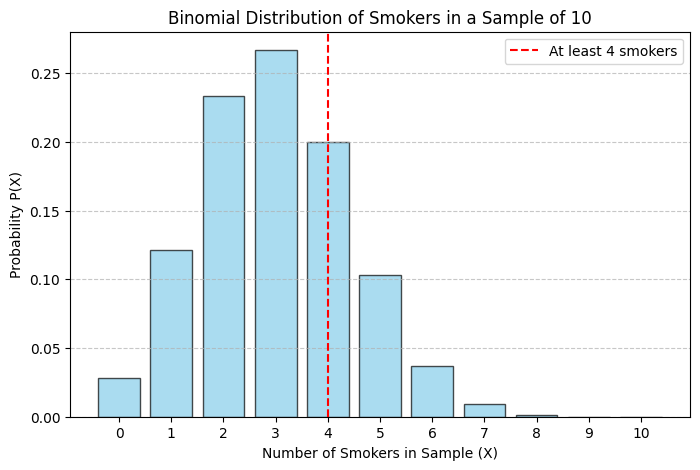

In [6]:
x = np.arange(0, n + 1)
y = binom.pmf(x, n, p_smoker)
plt.figure(figsize=(8, 5))
plt.bar(x, y, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(x=4, color="red", linestyle="dashed", label="At least 4 smokers")
plt.xlabel("Number of Smokers in Sample (X)")
plt.ylabel("Probability P(X)")
plt.title("Binomial Distribution of Smokers in a Sample of 10")
plt.xticks(x)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [7]:
p_expensive = 0.20
n = 15
k = 5
prob_exactly_5 = binom.pmf(k, n, p_expensive)
print(f"Probability of exactly 5 high-expense individuals: {prob_exactly_5:.4f}")

Probability of exactly 5 high-expense individuals: 0.1032


In [8]:
prob_at_most_5 = binom.cdf(k, n, p_expensive)
print(f"Cumulative probability of at most 5: {prob_at_most_5:.4f}")

Cumulative probability of at most 5: 0.9389


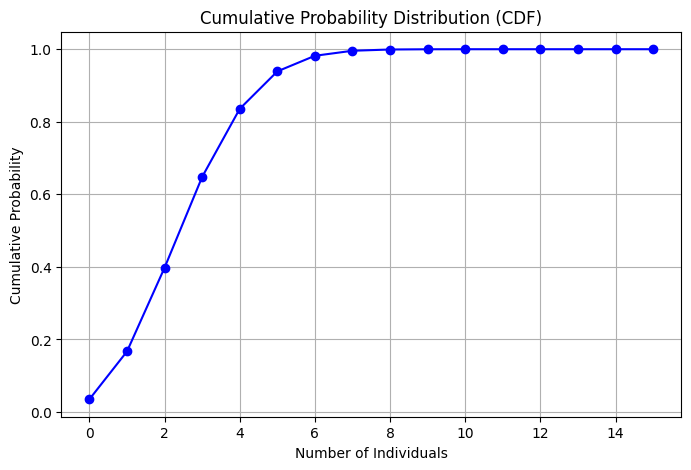

In [9]:
x = np.arange(0, n + 1)
y_cdf = binom.cdf(x, n, p_expensive)
plt.figure(figsize=(8, 5))
plt.plot(x, y_cdf, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Individuals")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Probability Distribution (CDF)")
plt.grid()
plt.show()

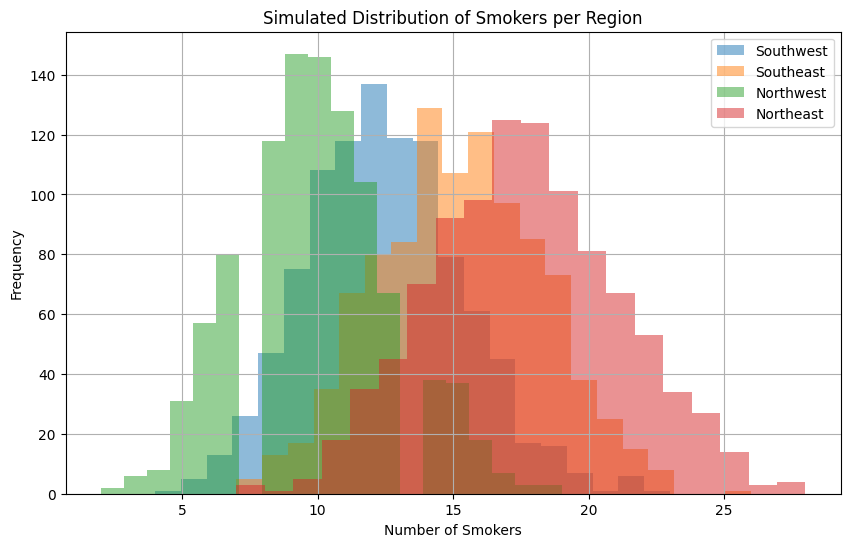

In [10]:
regions = {"Southwest": 0.25, "Southeast": 0.30, "Northwest": 0.20, "Northeast": 0.35}
n = 50
simulations = {region: np.random.binomial(n, p, 1000) for region, p in regions.items()}
plt.figure(figsize=(10, 6))
for region, data in simulations.items():
    plt.hist(data, bins=20, alpha=0.5, label=region)
plt.xlabel("Number of Smokers")
plt.ylabel("Frequency")
plt.title("Simulated Distribution of Smokers per Region")
plt.legend()
plt.grid()
plt.show()

In [11]:
expected_smokers = {region: n * p for region, p in regions.items()}
print("Expected number of smokers per region:", expected_smokers)

Expected number of smokers per region: {'Southwest': 12.5, 'Southeast': 15.0, 'Northwest': 10.0, 'Northeast': 17.5}


In [12]:
q_high_risk = binom.ppf(0.90, n=100, p=0.20)
print(f"Threshold for high-risk classification: {q_high_risk}")
p_high_risk = 0.20
n = 30
k = 8
prob_8_high_risk = binom.pmf(k, n, p_high_risk)
print(f"Probability of selecting 8 high-risk individuals: {prob_8_high_risk:.4f}")

Threshold for high-risk classification: 25.0
Probability of selecting 8 high-risk individuals: 0.1106


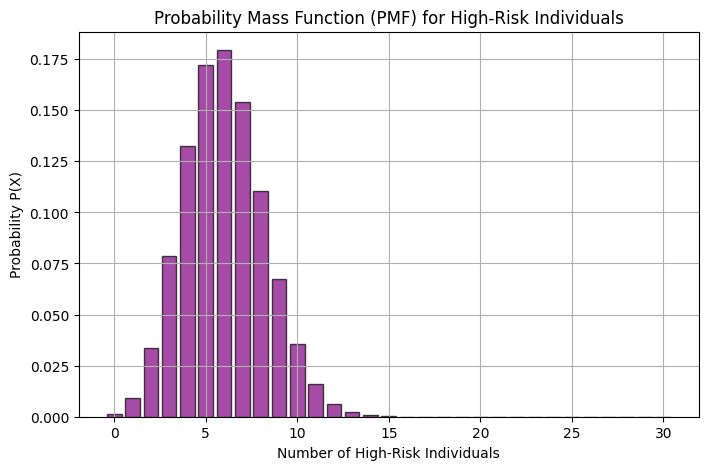

In [13]:
x = np.arange(0, n + 1)
y_pmf = binom.pmf(x, n, p_high_risk)
plt.figure(figsize=(8, 5))
plt.bar(x, y_pmf, color="purple", edgecolor="black", alpha=0.7)
plt.xlabel("Number of High-Risk Individuals")
plt.ylabel("Probability P(X)")
plt.title("Probability Mass Function (PMF) for High-Risk Individuals")
plt.grid()
plt.show()

Probability of at least 5 individuals with >3 children: 0.5618


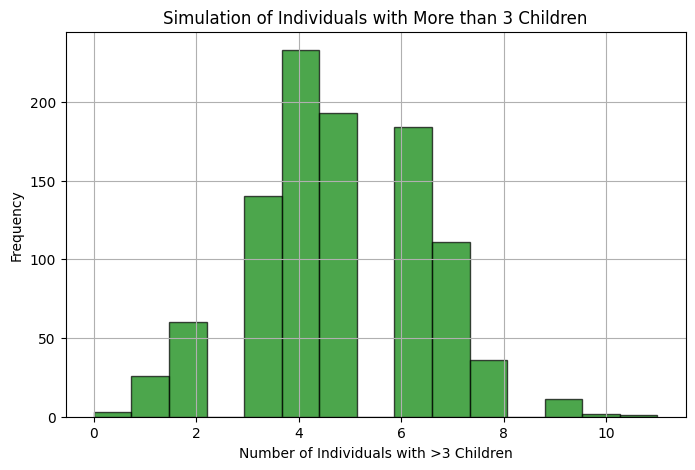

In [14]:
p_more_than_3_children = 0.40
n = 12
k = 5
prob_at_least_5_children = 1 - binom.cdf(k-1, n, p_more_than_3_children)
print(f"Probability of at least 5 individuals with >3 children: {prob_at_least_5_children:.4f}")
simulated_children = np.random.binomial(n, p_more_than_3_children, 1000)
plt.figure(figsize=(8, 5))
plt.hist(simulated_children, bins=15, color='green', edgecolor='black', alpha=0.7)
plt.xlabel("Number of Individuals with >3 Children")
plt.ylabel("Frequency")
plt.title("Simulation of Individuals with More than 3 Children")
plt.grid()
plt.show()

In [15]:
simulated_mean = np.mean(simulated_children)
simulated_variance = np.var(simulated_children)
theoretical_mean = n * p_more_than_3_children
theoretical_variance = n * p_more_than_3_children * (1 - p_more_than_3_children)
print(f"Simulated Mean: {simulated_mean:.2f}, Theoretical Mean: {theoretical_mean:.2f}")
print(f"Simulated Variance: {simulated_variance:.2f}, Theoretical Variance: {theoretical_variance:.2f}")

Simulated Mean: 4.76, Theoretical Mean: 4.80
Simulated Variance: 2.98, Theoretical Variance: 2.88
